How would you propose to generalize “z-scoring” (e.g., subtraction of the mean, normalization by the standard deviation) from the 1D case
to the multivariate case, where $x \in \mathbb{R}^D$? Generate a synthetic dataset with $10^4$
data points drawn from bivariate Gaussian distribution with different means and
standard deviations for both variables (e.g., $\bar{x}_1 = 10$, $\bar{x}_2 = 1$, and $\sigma_1 = 2$,
$\sigma_2 = 1$), and for three different correlation coefficients (e.g., $\rho = 0, 0.5, 0.95$).
Does your proposed transformation alter the covariance matrix?

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.stats import multivariate_normal

Z-scoring: for each data point, subtract the sample mean and divide by the standard deviation.

$$
z^{t} = \frac{x^{t} - \bar{x}}{\sigma_x}
$$

# 1D Case

In [48]:
x_1 = np.random.normal(size=10)
x_2 = np.random.normal(size=10)
x_3 = np.random.normal(size=10)
x_4 = np.random.normal(size=10)
x_5 = np.random.normal(size=10)

In [49]:
def z_score(data):
    xbar = np.mean(data)
    sigma = np.std(data)
    data_zscored = np.zeros(len(data))
    for element in range(len(data)):
        data_zscored[element] = (data[element] - xbar) / sigma
        
    return data_zscored
        
x1_zscored = z_score(x_1)
x2_zscored = z_score(x_2)
x3_zscored = z_score(x_3)
x4_zscored = z_score(x_4)
x5_zscored = z_score(x_5)

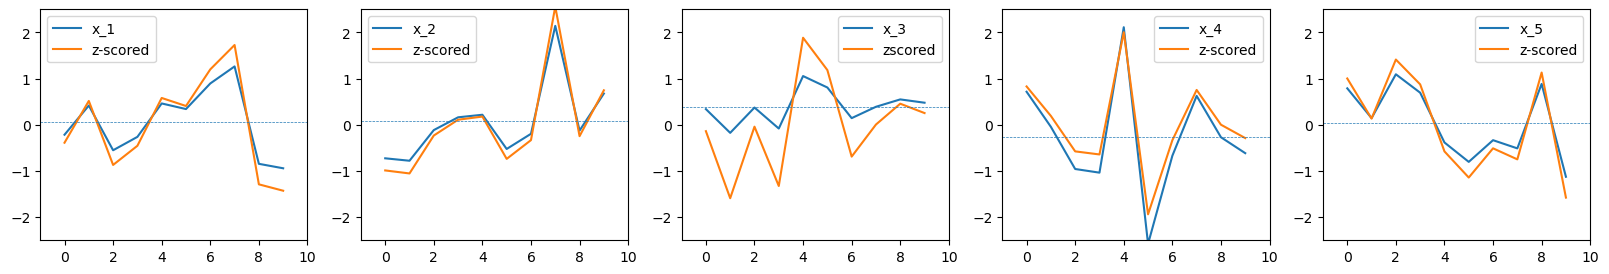

In [50]:
plt.figure(figsize=(20,3))

plt.subplot(151)
plt.xlim((-1,10))
plt.ylim((-2.5,2.5))
plt.plot(x_1, label='x_1')
plt.plot(x1_zscored, label='z-scored')
plt.axhline(y = np.mean(x_1), linewidth=0.5, linestyle='--')
plt.legend()

plt.subplot(152)
plt.xlim((-1,10))
plt.ylim((-2.5,2.5))
plt.plot(x_2, label='x_2')
plt.plot(x2_zscored, label='z-scored')
plt.axhline(y = np.mean(x_2), linewidth=0.5, linestyle='--')
plt.legend()

plt.subplot(153)
plt.xlim((-1,10))
plt.ylim((-2.5,2.5))
plt.plot(x_3, label='x_3')
plt.plot(x3_zscored, label='zscored')
plt.axhline(y = np.mean(x_3), linewidth=0.5, linestyle='--')
plt.legend()

plt.subplot(154)
plt.xlim((-1,10))
plt.ylim((-2.5,2.5))
plt.plot(x_4, label='x_4')
plt.plot(x4_zscored, label='z-scored')
plt.axhline(y = np.mean(x_4), linewidth=0.5, linestyle='--')
plt.legend()

plt.subplot(155)
plt.xlim((-1,10))
plt.ylim((-2.5,2.5))
plt.plot(x_5, label='x_5')
plt.plot(x5_zscored, label='z-scored')
plt.axhline(y = np.mean(x_5), linewidth=0.5, linestyle='--')
plt.legend()

plt.show()

# Multivariate case

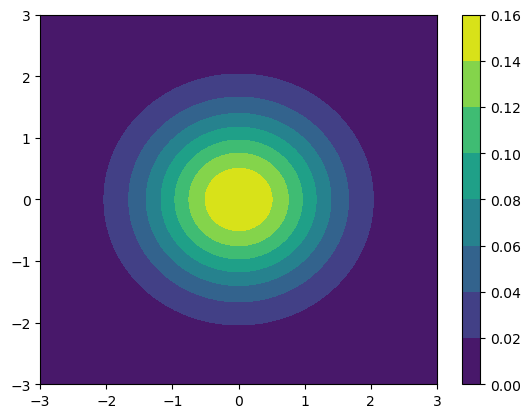

In [137]:
mu = np.array([0,0])
cov = np.array([[1,0],[0,1]])

N = 100
x, y = np.meshgrid(np.linspace(-3,3,N), np.linspace(-3,3,N))

pos = np.empty(x.shape + (2,)) # shape (N, N, 2)
pos[:, :, 0] = x
pos[:, :, 1] = y

rv = stats.multivariate_normal(mu, cov)
z = rv.pdf(pos)

plt.contourf(x, y, z)
plt.colorbar()
plt.show()

[[4 0]
 [0 1]]


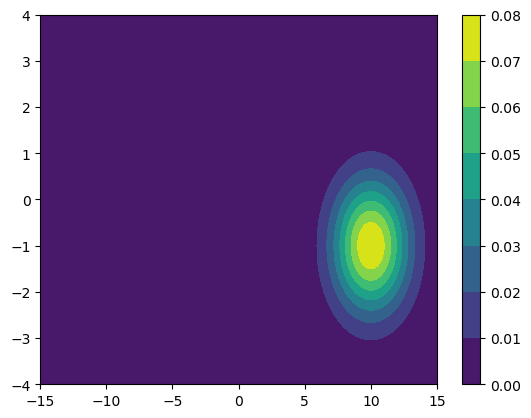

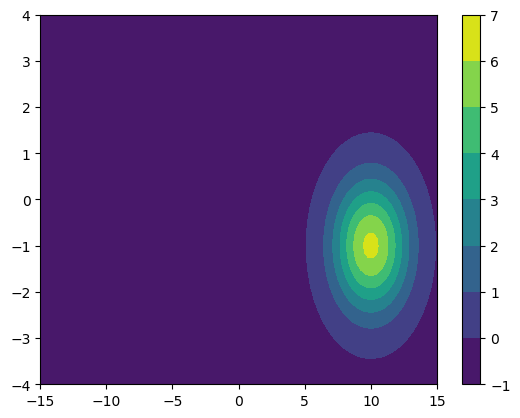

In [161]:
def getCovN2(sigma1, sigma2, rho):
    cov = np.array([[sigma1**2, rho*sigma1*sigma2], [rho*sigma2*sigma1, sigma2**2]])
    return cov

mu = np.array([10, -1])
sigma1 = 2
sigma2 = 1

'''
No correlation
'''
rho = 0
cov = getCovN2(sigma1, sigma2, rho)


N = 100
x, y = np.meshgrid(np.linspace(-mu[0]-5,mu[0]+5,N), np.linspace(-mu[1]-5,mu[1]+5,N))

pos = np.empty(x.shape + (2,)) # shape (N, N, 2)
pos[:, :, 0] = x
pos[:, :, 1] = y

rv = stats.multivariate_normal(mu, cov)
z = rv.pdf(pos)

plt.contourf(x, y, z)
plt.colorbar()
plt.show()


z_zscored = (z - np.mean(z)) / np.std(z)
plt.contourf(x, y, z_zscored)
plt.colorbar()
plt.show()

## 2D case 

Covariance is a measure of the joint variability between two random variables. Specifically, covariance measures how much two random variables vary together, or co-vary, from their expected values. If the two variables tend to increase or decrease together, their covariance is positive; if one tends to increase when the other decreases, their covariance is negative; if there is no relationship between the variables, their covariance is zero.

For two random variables $X$ and $Y$, the covariance is denoted by $\mathrm{cov}(X,Y)$ and is defined as follows:

$$\mathrm{cov}(X,Y) = \mathbb{E}[(X - \mu_X)(Y - \mu_Y)]$$

where $\mu_X$ and $\mu_Y$ are the means of $X$ and $Y$, respectively, and $\mathbb{E}$ denotes the expectation operator.

Alternatively, the covariance can be expressed in terms of the expected values of the two variables themselves:

$$\mathrm{cov}(X,Y) = \mathbb{E}(XY) - \mathbb{E}(X)\mathbb{E}(Y)$$

The covariance is a useful concept in statistics and data analysis, as it provides a measure of the linear relationship between two variables. A positive covariance indicates that the variables tend to move together in the same direction, while a negative covariance indicates that they tend to move in opposite directions. A covariance of zero indicates that there is no linear relationship between the variables.

However, the magnitude of the covariance depends on the scales of the variables, which can make it difficult to compare covariances across different datasets. To address this issue, the concept of correlation is often used instead, which scales the covariance by the standard deviations of the variables to produce a value between -1 and 1 that is independent of the scales of the variables.

A covariance matrix is a matrix that summarizes the joint variability of multiple random variables. Specifically, it is a square matrix that contains the covariances between pairs of variables, as well as the variances of each variable.

For a set of $D$ random variables $X_1, X_2, ..., X_D$, the covariance matrix $\mathbf{\Sigma}$ is defined as follows:

$$\mathbf{\Sigma} = \begin{bmatrix} \mathrm{var}(X_1) & \mathrm{cov}(X_1, X_2) & \cdots & \mathrm{cov}(X_1, X_D) \ \mathrm{cov}(X_2, X_1) & \mathrm{var}(X_2) & \cdots & \mathrm{cov}(X_2, X_D) \ \vdots & \vdots & \ddots & \vdots \ \mathrm{cov}(X_D, X_1) & \mathrm{cov}(X_D, X_2) & \cdots & \mathrm{var}(X_D) \end{bmatrix}$$

where $\mathrm{var}(X_i)$ is the variance of variable $X_i$, and $\mathrm{cov}(X_i, X_j)$ is the covariance between variables $X_i$ and $X_j$.

The diagonal elements of the covariance matrix are the variances of each variable, while the off-diagonal elements are the covariances between pairs of variables. The covariance matrix is symmetric, since the covariance between $X_i$ and $X_j$ is the same as the covariance between $X_j$ and $X_i$.

The covariance matrix is a fundamental concept in multivariate statistics and is used in many areas of data analysis, such as principal component analysis, linear discriminant analysis, and clustering. It provides a comprehensive summary of the joint variability between multiple variables, and can be used to identify relationships between variables and to quantify the amount of redundancy or correlation between them.